***Оглавление***

<a href='#part1'>***1. Описание проекта***</a>

<a href='#part2'>***2. Описание данных***</a>

<a href='#part3'>***3. Открытие файлов и изучение общей информации***</a>

<a href='#part4'>***4. Предварительная обработка данных***</a>

<a href='#part5'>***5. Анализ тарифов***</a>

<a href='#part6'>***6. Графики по тарифам***</a>

<a href='#part7'>***7. Проверка гипотез***</a>

<a href='#part8'>***8. Вывод***</a>

<a id='part1'>***1. Описание проекта***</a>

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагается два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

**Тариф «Смарт»**
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

**Важно!** «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

<a id='part2'>***2. Описание данных***</a>

**Таблица users** (информация о пользователях):

user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, 
то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tariff — название тарифного плана


**Таблица calls** (информация о звонках):

id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок


**Таблица messages** (информация о сообщениях):

id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение


**Таблица internet** (информация об интернет-сессиях):

id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя


**Таблица tariffs** (информация о тарифах):

tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<a id='part3'>***3. Открытие файлов и изучение общей информации***</a>

In [2]:
# Загружаем библиотеки, читаем файлы и выводим для изучения первые строки
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")
pd.options.display.max_columns=30

try:
    calls=pd.read_csv('/datasets/calls.csv')
    internet=pd.read_csv('/datasets/internet.csv')
    messages=pd.read_csv('/datasets/messages.csv')
    tariffs=pd.read_csv('/datasets/tariffs.csv')
    users=pd.read_csv('/datasets/users.csv')

except:
    calls=pd.read_csv('/Users/ASUS/Desktop/практикум/модуль 1/спринт4.Статистика/проект/calls.csv')
    internet=pd.read_csv('/Users/ASUS/Desktop/практикум/модуль 1/спринт4.Статистика/проект/internet.csv')
    messages=pd.read_csv('/Users/ASUS/Desktop/практикум/модуль 1/спринт4.Статистика/проект/messages.csv')
    tariffs=pd.read_csv('/Users/ASUS/Desktop/практикум/модуль 1/спринт4.Статистика/проект/tariffs.csv')
    users=pd.read_csv('/Users/ASUS/Desktop/практикум/модуль 1/спринт4.Статистика/проект/users.csv')

    
calls.info()
print('\n\n')
internet.info()
print('\n\n')
messages.info()
print('\n\n')
messages.head()
print('\n\n')
tariffs.info()
print('\n\n')
users.info()
print('\n\n')
display(calls.head(), internet.head(), messages.head(), tariffs.head(), users.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (tota

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### В целом, данные качественные: названия столбцов названы корректно, дата записана в типе данных object, что в дальнейшем потребует перевода в другой тип. В столбце с данными по интернету есть лишний столбец не несущий никакой смысловой нагрузки и от которого в дальнейшем избавимся. Есть строки с нулевыми значениями, которые могут показывать пропущенные звонки. На доход оператора связи они никак не влияют, поэтому эти строки удалим.

<a id='part4'>***4. Предварительная обработка данных***</a>

In [3]:
# Т.к. необходимо определить выгодность тарифов, строки с нулевыми значениями
# в столбцах "длительность разговора" и "объем интернет-трафика" удаляем 
# последовательно в 2 таблицах
calls_rows_1=calls.shape[0]
internet_rows_1=internet.shape[0]


calls=calls.drop(calls.index[calls['duration'] == 0]).reset_index(drop=True)
internet=internet.drop(internet.index[internet['mb_used'] == 0]).reset_index(drop=True)

calls_rows_2=calls.shape[0]
internet_rows_2=internet.shape[0]
print('В таблице Звонки удалили строк:',calls_rows_1-calls_rows_2)
print('В таблице Интернет удалили строк:',internet_rows_1-internet_rows_2)
print('\n\n')
# удаляем лишний столбец, появившийся скорее всего из таблицы excel
internet=internet.drop(['Unnamed: 0'], axis='columns')
      
                       
# проверка                       
calls.info()
print('\n\n')
internet.info()
# переводим в тарифах Гигабайты в Мегабайты
tariffs['rub_per_gb']=tariffs['rub_per_gb']/1000
tariffs.set_axis(['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_mb', 'rub_per_message', 'rub_per_minute', 'tariff_name'], axis='columns', inplace=True)

В таблице Звонки удалили строк: 39613
В таблице Интернет удалили строк: 19598



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162994 entries, 0 to 162993
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         162994 non-null  object 
 1   call_date  162994 non-null  object 
 2   duration   162994 non-null  float64
 3   user_id    162994 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.0+ MB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129798 entries, 0 to 129797
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            129798 non-null  object 
 1   mb_used       129798 non-null  float64
 2   session_date  129798 non-null  object 
 3   user_id       129798 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.0+ MB


In [4]:
# Переводим столбцы с датой в тип datetime
calls['call_date']=pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date']=pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date']=pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date']=pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# переименуем во избежании путаницы столбец "id" в "messages" в таблице "сообщения"
messages.set_axis(['messages', 'message_date', 'user_id'], axis='columns', inplace=True)

### Произведены необходимые преобразования: удалены строки с нулевыми значениями в столбцах звонки и трафик интернета, удален лишний столбец в таблице "интернет", дата переведена в тип данных datetime, переименован один столбец и переведены Гб в Мб. Теперь данные готовы для дальнейших преобразований и расчетов.

<a id='part5'>***5. Анализ тарифов***</a>

In [5]:
# округляем минуты звонков и Мб интернета вверх
calls['duration'] = calls['duration'].apply(lambda x: math.ceil(x))
internet['mb_used'] = internet['mb_used'].apply(lambda x: math.ceil(x))


# создаем столбец с номером месяца и группируем таблицу по пользователю и 
# месяцу
calls['month']=calls['call_date'].dt.month
calls_pivot=calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
calls.info()
print('\n\n')


# повторяем тоже самое для таблицы с интернетом
internet['month']=internet['session_date'].dt.month
internet_pivot=internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum', 'count'])
internet_pivot.info()
print('\n\n')


# повторяем для таблицы с сообщениями
messages['month']=messages['message_date'].dt.month
messages_pivot=messages.pivot_table(index=['user_id', 'month'], values='messages', aggfunc=['count'])
messages_pivot.info()


# проверка
display(calls_pivot.head(), internet_pivot.head(), messages_pivot.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162994 entries, 0 to 162993
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         162994 non-null  object        
 1   call_date  162994 non-null  datetime64[ns]
 2   duration   162994 non-null  int64         
 3   user_id    162994 non-null  int64         
 4   month      162994 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB



<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3201 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   (sum, mb_used)    3201 non-null   int64
 1   (count, mb_used)  3201 non-null   int64
dtypes: int64(2)
memory usage: 63.5 KB



<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
 #   Column         

sum    count
              duration duration
user_id month                  
1000    5          159       17
        6          172       28
        7          340       41
        8          408       42
        9          466       46

sum   count
              mb_used mb_used
user_id month                
1000    5        2256       4
        6       23257      44
        7       14016      28
        8       14070      27
        9       14581      25

count
              messages
user_id month         
1000    5           22
        6           60
        7           75
        8           81
        9           57

In [6]:
# соединяем таблицы между собой
df=calls_pivot.join(internet_pivot, on=['user_id', 'month'], how='outer')
df=df.join(messages_pivot, on=['user_id', 'month'], how='outer')
df=df.reset_index()


# добавляем к таблице столбец с тарифами и проверяем результат
users = users.set_index('user_id')
df=df.join(users[['tariff', 'city']], on='user_id')
display(df.head())
df.info()
print('\n\n')


# меняем названия столбцов 
df.columns=['user_id', 'month', 'sum_duration', 'count_ duration', 'sum_mb_used', 'count_ mb_used', 'count_messages', 'tariff', 'city']

# Т.к. стольбцы с количеством выходов в интернет и количеством звонков нам 
# не нужны, удаляем их
df=df.drop(['count_ duration', 'count_ mb_used'], axis='columns')


# после слияния таблиц образовались пропуски в тех столбцах, которые обозна-
# чают услугу оператора связи, которой не пользовался конкретный абонент.
# Эти пропуски заменим на медиану по столбцу


# подсчитываем количество пропусков в столбцах
print((df.isnull().sum()/len(df)*100))


# заменяем пропуски в столбцах на медиану
median_sum_duration=df['sum_duration'].median()
median_sum_mb_used=df['sum_mb_used'].median()
median_count_messages=df['count_messages'].median()


def sum_duration_to_med(row):
    if row['sum_duration']!=row['sum_duration']:
        return median_sum_duration
    else: return row['sum_duration']
df['sum_duration']=df.apply(sum_duration_to_med, axis=1)


def sum_mb_used_to_med(row):
    if row['sum_mb_used']!=row['sum_mb_used']:
        return median_sum_mb_used
    else: return row['sum_mb_used']
df['sum_mb_used']=df.apply(sum_mb_used_to_med, axis=1)


def count_messages_to_med(row):
    if row['count_messages']!=row['count_messages']:
        return median_count_messages
    else: return row['count_messages']
df['count_messages']=df.apply(count_messages_to_med, axis=1)
print('\n\n')
print(df.info())

,"(user_id, )","(month, )","(sum, duration)","(count, duration)","(sum, mb_used)","(count, mb_used)","(count, messages)",tariff,city
0,1000,5,159.0,17.0,2256.0,4.0,22.0,ultra,Краснодар
1,1000,6,172.0,28.0,23257.0,44.0,60.0,ultra,Краснодар
2,1000,7,340.0,41.0,14016.0,28.0,75.0,ultra,Краснодар
3,1000,8,408.0,42.0,14070.0,27.0,81.0,ultra,Краснодар
4,1000,9,466.0,46.0,14581.0,25.0,57.0,ultra,Краснодар


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (user_id, )        3214 non-null   int64  
 1   (month, )          3214 non-null   int64  
 2   (sum, duration)    3168 non-null   float64
 3   (count, duration)  3168 non-null   float64
 4   (sum, mb_used)     3201 non-null   float64
 5   (count, mb_used)   3201 non-null   float64
 6   (count, messages)  2717 non-null   float64
 7   tariff             3214 non-null   object 
 8   city               3214 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 226.1+ KB



user_id            0.000000
month              0.000000
sum_duration       1.431238
sum_mb_used        0.404480
count_messages    15.463597
tariff             0.000000
city               0.000000
dtype: float64



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data column

In [7]:
# сохраняем в переменные значения тарифов 
smart_minutes_included=tariffs['minutes_included'][0]
smart_rub_per_minute=tariffs['rub_per_minute'][0]
ultra_minutes_included=tariffs['minutes_included'][1]
ultra_rub_per_minute=tariffs['rub_per_minute'][1]


smart_mb_per_month_included=tariffs['mb_per_month_included'][0]
smart_rub_per_mb=tariffs['rub_per_mb'][0]
ultra_mb_per_month_included=tariffs['mb_per_month_included'][1]
ultra_rub_per_mb=tariffs['rub_per_mb'][1]

smart_messages_included=tariffs['messages_included'][0]
smart_rub_per_message=tariffs['rub_per_message'][0]
ultra_messages_included=tariffs['messages_included'][1]
ultra_rub_per_message=tariffs['rub_per_message'][1]

smart_monthly_fee=tariffs['rub_monthly_fee'][0]
ultra_monthly_fee=tariffs['rub_monthly_fee'][1]


# подсчитываем выручку оператора по каждому тарифу и клиенту
def revenue(row):
    if row['tariff']=='smart':
        if row['sum_duration']>smart_minutes_included:
            revenue_smart_calls=((row['sum_duration']-smart_minutes_included)*
                               smart_rub_per_minute)
        else: revenue_smart_calls=0
    elif row['tariff']=='ultra':
        if row['sum_duration']>ultra_minutes_included:
            revenue_ultra_calls=((row['sum_duration']-ultra_minutes_included)*
                               ultra_rub_per_minute)
        else: revenue_ultra_calls=0 
            
            
            
            
    if row['tariff']=='smart':
        if row['sum_mb_used']>smart_mb_per_month_included:
            revenue_smart_internet=((row['sum_mb_used']-smart_mb_per_month_included)*
                                  smart_rub_per_mb)
        else: revenue_smart_internet=0
    elif row['tariff']=='ultra':
        if row['sum_mb_used']>ultra_mb_per_month_included:
            revenue_ultra_internet=((row['sum_mb_used']-ultra_mb_per_month_included)*
                                  ultra_rub_per_mb)
        else: revenue_ultra_internet=0 
            
            
            
    if row['tariff']=='smart':
        if row['count_messages']>smart_messages_included:
            revenue_smart_messages=((row['count_messages']-smart_messages_included)*
                                  smart_rub_per_message)
        else: revenue_smart_messages=0 
    elif row['tariff']=='ultra':
        if row['count_messages']>ultra_messages_included:
            revenue_ultra_messages=((row['count_messages']-ultra_messages_included)*
                                  ultra_rub_per_message)
        else: revenue_ultra_messages=0 
            
            
            
    if row['tariff']=='smart':
        revenue=(revenue_smart_calls+revenue_smart_internet+
                 revenue_smart_messages+smart_monthly_fee)
        return revenue
    else:
        revenue=(revenue_ultra_calls+revenue_ultra_internet+
                 revenue_ultra_messages+ultra_monthly_fee)
        return revenue
df['revenue']=df.apply(revenue, axis=1)

display(df.head())

,user_id,month,sum_duration,sum_mb_used,count_messages,tariff,city,revenue
0,1000,5,159.0,2256.0,22.0,ultra,Краснодар,1950.0
1,1000,6,172.0,23257.0,60.0,ultra,Краснодар,1950.0
2,1000,7,340.0,14016.0,75.0,ultra,Краснодар,1950.0
3,1000,8,408.0,14070.0,81.0,ultra,Краснодар,1950.0
4,1000,9,466.0,14581.0,57.0,ultra,Краснодар,1950.0


In [8]:
# Подсчитываем среднюю, дисперсию и стандартное отклонение по тарифам в 
# месяц. Т.к. исходная таблица итак сгруппирована по месяцам, для построения
# новой таблицы достаточно будет сгруппировать ее по тарифам
tariff_grouped=(df.groupby('tariff')['sum_duration', 'sum_mb_used', 'count_messages', 'revenue'].agg(['mean', 'var', 'std'])).round()
display(tariff_grouped)

# подсчитываем количество абонентов каждого тарифа
print(df.groupby('tariff')['user_id'].count())

sum_duration                 sum_mb_used                      \
               mean      var    std        mean         var     std   
tariff                                                                
smart         420.0  35593.0  189.0     16244.0  34309760.0  5857.0   
ultra         544.0  90107.0  300.0     19677.0  97724466.0  9886.0   

       count_messages               revenue                   
                 mean     var   std    mean       var    std  
tariff                                                        
smart            39.0   619.0  25.0  1247.0  645576.0  803.0  
ultra            57.0  1786.0  42.0  2063.0  133120.0  365.0

tariff
smart    2229
ultra     985
Name: user_id, dtype: int64


### Количество использованных сообщений в тарифе ультра на 60% (39 против 61) больше, чем в тарифе смарт; минут на 30%(396 против 517), а интернета на 21%(16222 против 19688). Что выглядит вполне логично, на то он и повышенный тариф. Однако выручка с тарифов кардинально отличается: выручка по тарифу смарт в среднем на 45%  превышает абонентскую плату, тогда как по тарифу ультра всего на 6%. Это говорит о том, что пользователи смарта чаще и больше превышают установленные тарифом лимиты, а пользователи ультра недобирают их.

<a id='part6'>***6. Графики по тарифам***</a>

count_messages            revenue         sum_duration           \
tariff           smart  ultra       smart   ultra        smart    ultra   
user_id                                                                   
1000               NaN   62.0         NaN  1950.0          NaN  320.750   
1001              38.0    NaN  859.200000     NaN   422.000000      NaN   
1002              10.0    NaN  967.342857     NaN   216.714286      NaN   
1003               NaN   76.0         NaN  1950.0          NaN  764.400   
1004               NaN  149.0         NaN  1950.0          NaN  123.375   

          sum_mb_used           
tariff          smart    ultra  
user_id                         
1000              NaN  13436.5  
1001     16252.500000      NaN  
1002     16597.571429      NaN  
1003              NaN  11465.8  
1004              NaN  18646.5

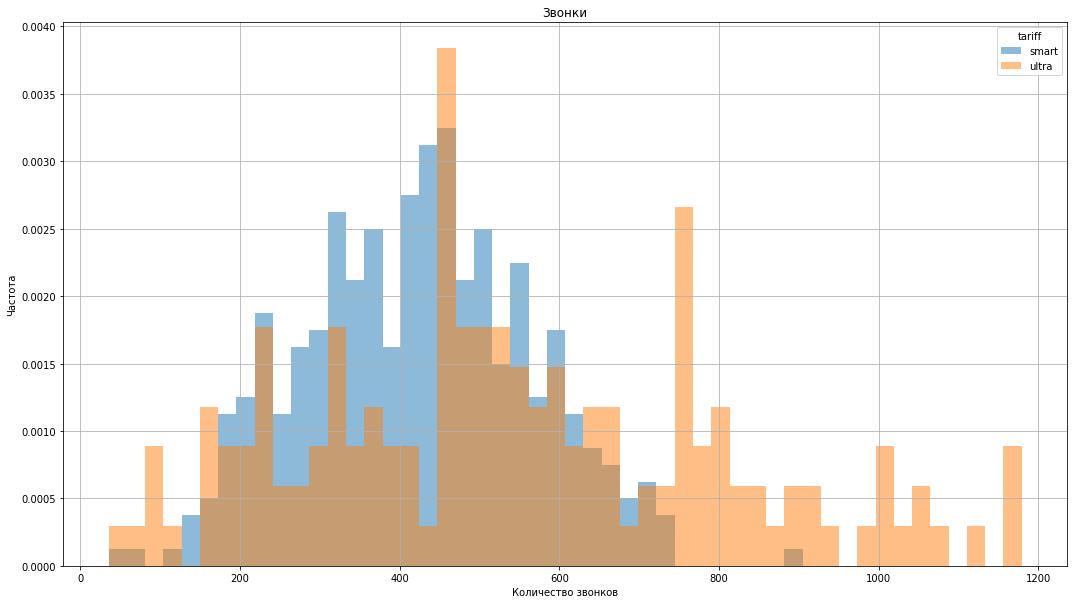

In [9]:
# выводим гистограммы по сгруппированным данным
user_tariff=df.pivot_table(index=['user_id'], columns=['tariff'], values=['sum_duration', 'sum_mb_used', 'count_messages', 'revenue'])
display(user_tariff.head())
user_tariff.plot(kind='hist', y='sum_duration', bins=50, alpha=0.5, figsize=(18, 10), grid=True, density=True, title='Звонки')
plt.xlabel('Количество звонков')
plt.ylabel('Частота')
plt.show()

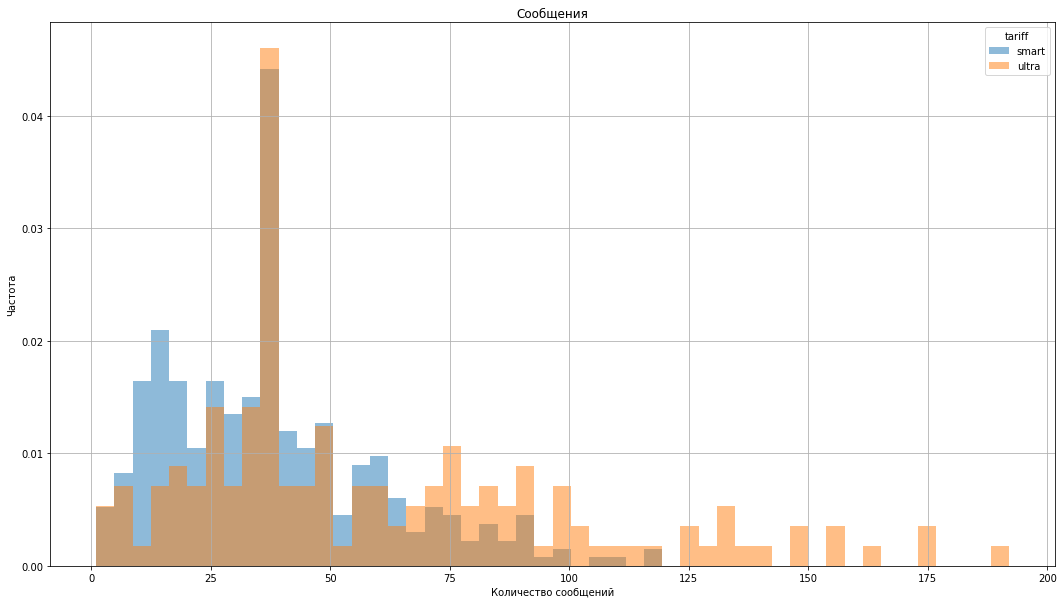

In [10]:
user_tariff.plot(kind='hist', y='count_messages', bins=50, density=True, alpha=0.5, figsize=(18, 10), grid=True, title='Сообщения')
plt.xlabel('Количество сообщений')
plt.ylabel('Частота')
plt.show()

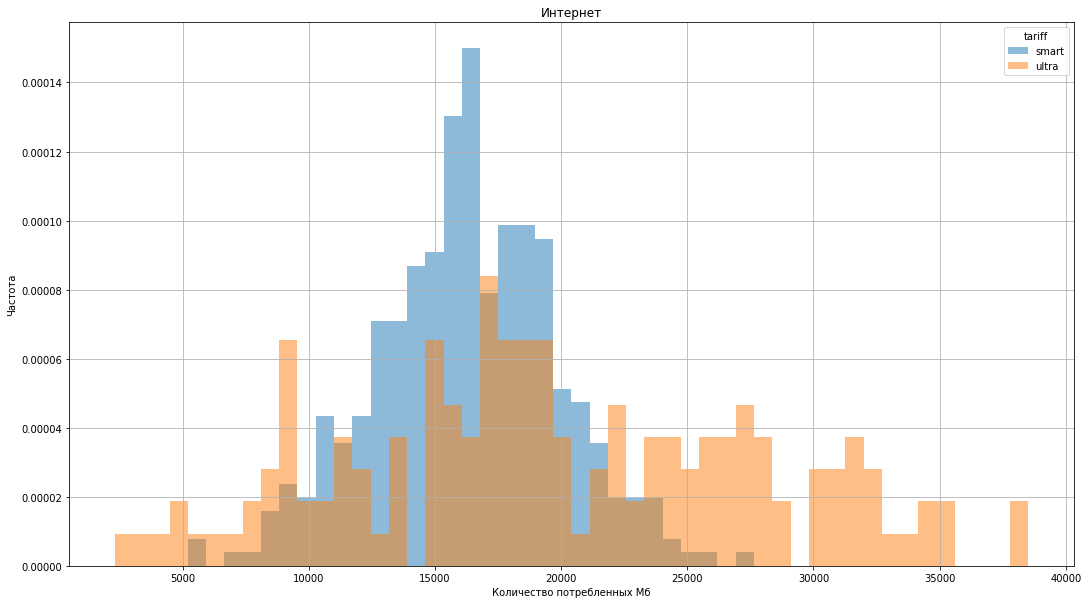

In [11]:
user_tariff.plot(kind='hist', y='sum_mb_used', bins=50, density=True, alpha=0.5, figsize=(18, 10), grid=True, title='Интернет')
plt.xlabel('Количество потребленных Мб')
plt.ylabel('Частота')
plt.show()

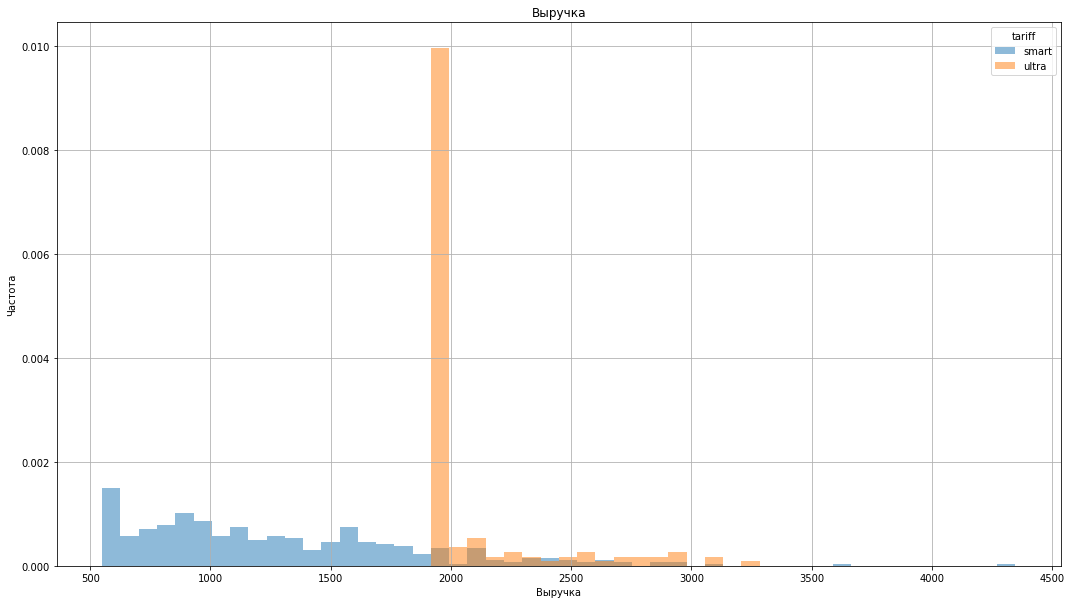

In [12]:
user_tariff.plot(kind='hist', y='revenue', bins=50, density=True, alpha=0.5, figsize=(18, 10), grid=True, title='Выручка')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.show()

### На построенных гистограммах наблюдается почти нормальное распределение со скошенностью набора данных вправо. Распределение Пуассона наблюдается по выручке с клиентов . На гистограмме выручки тарифа ультра тонкий хвост говорит о редком превышении лимитов тарифа пользователями, тогда как широкий и протяженный хвост тарифа смарт говорит о частом превышении пользователями отведенных тарифом лимитах 

<a id='part7'>***7. Проверка гипотез***</a>

In [13]:
# Определим нулевую гипотезу: выручка 2 тарифов равна. Альтернативная гипо-
# теза будет означать неравенство выручки 2 тарифов. За уровень значимости
# примем 5%. Т.е. если вероятность события будет меньше 5%, значит есть все
# основания отвергнуть нулевую гипотезу, если же больше 5% оснований отвергнуть
# нулевую гипотезу нет и мы принимаем альтернативную гипотезу. Перед проверкой
# гипотез сравним дисперсию 2 выборок(тарифов) и учтем это в нашем расчете:
# если дисперсии отличаются более чем на 5%, считаем различия в выборках
# значимыми

# строим таблицы с абонентами тарифов 
user_smart=df[df['tariff']=='smart']
user_ultra=df[df['tariff']=='ultra']

display(user_smart.head(), user_ultra.head())
display(user_smart['revenue'].var(), user_ultra['revenue'].var())

# различия по выборкам принимаем значимыми - equal_var=False
alpha=0.05
results = st.ttest_ind(user_smart['revenue'], user_ultra['revenue'], equal_var=False)

print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

,user_id,month,sum_duration,sum_mb_used,count_messages,tariff,city,revenue
8,1001,11,430.0,18452.0,38.0,smart,Москва,1168.4
9,1001,12,414.0,14053.0,38.0,smart,Москва,550.0
10,1002,6,117.0,10871.0,4.0,smart,Стерлитамак,550.0
11,1002,7,214.0,17601.0,11.0,smart,Стерлитамак,998.2
12,1002,8,289.0,20347.0,13.0,smart,Стерлитамак,1547.4


,user_id,month,sum_duration,sum_mb_used,count_messages,tariff,city,revenue
0,1000,5,159.0,2256.0,22.0,ultra,Краснодар,1950.0
1,1000,6,172.0,23257.0,60.0,ultra,Краснодар,1950.0
2,1000,7,340.0,14016.0,75.0,ultra,Краснодар,1950.0
3,1000,8,408.0,14070.0,81.0,ultra,Краснодар,1950.0
4,1000,9,466.0,14581.0,57.0,ultra,Краснодар,1950.0


645576.1480056995

133120.1682544416

p-значение:  7.87666659929873e-280
Отвергаем нулевую гипотезу


In [14]:
# Определим нулевую гипотезу: выручка в Москве и регионах равна. Альтернатив-
# ная гипотеза будет означать неравенство выручки. За уровень значимости
# примем 5%. Т.е. если вероятность события будет меньше 5%, значит есть все
# основания отвергнуть нулевую гипотезу, если же больше 5% оснований отвергнуть
# нулевую гипотезу нет и мы принимаем альтернативную гипотезу. Перед проверкой
# гипотез сравним дисперсию 2 выборок и учтем это в нашем расчете:
# если дисперсии отличаются более чем на 5%, считаем различия в выборках
# значимыми

# строим таблицы с абонентами Москвы и других регионов
user_Moscow=df[df['city']=='Москва']
user_regions=df[df['city']!= 'Москва']

display(user_Moscow.head(), user_regions.head())
print('Среднемесячная выручка в Москве: ', user_Moscow['revenue'].mean())
print('Среднемесячная выручка в регионах: ', user_regions['revenue'].mean())
display(user_Moscow['revenue'].var(), user_regions['revenue'].var())

# различия по выборкам принимаем значимыми - equal_var=False
alpha=0.05
results = st.ttest_ind(user_Moscow['revenue'], user_regions['revenue'], equal_var=False)

print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

,user_id,month,sum_duration,sum_mb_used,count_messages,tariff,city,revenue
8,1001,11,430.0,18452.0,38.0,smart,Москва,1168.4
9,1001,12,414.0,14053.0,38.0,smart,Москва,550.0
17,1003,8,380.0,8571.0,37.0,ultra,Москва,1950.0
18,1003,9,961.0,12479.0,91.0,ultra,Москва,1950.0
19,1003,10,855.0,14779.0,83.0,ultra,Москва,1950.0


,user_id,month,sum_duration,sum_mb_used,count_messages,tariff,city,revenue
0,1000,5,159.0,2256.0,22.0,ultra,Краснодар,1950.0
1,1000,6,172.0,23257.0,60.0,ultra,Краснодар,1950.0
2,1000,7,340.0,14016.0,75.0,ultra,Краснодар,1950.0
3,1000,8,408.0,14070.0,81.0,ultra,Краснодар,1950.0
4,1000,9,466.0,14581.0,57.0,ultra,Краснодар,1950.0


Среднемесячная выручка в Москве:  1515.902782324059
Среднемесячная выручка в регионах:  1492.4138109873224


559020.1400250329

647017.622248653

p-значение:  0.491224616489774
Не получилось отвергнуть нулевую гипотезу


### В результате проверки гипотез выяснилось, что выручки не равны по тарифам, но одинаковы по регионам Москва и другие области страны и вероятность такого события достаточно велика (49%).

<a id='part8'>***8. Вывод***</a>

### В ходе анализа данных оператора связи выяснилось, что абоненты тарифа смарт гораздо чаще выходят за рамки доступных лимитов и соответственно переплачивают за связь, тогда как абоненты тарифа ультра недобирают свои лимиты. В ходе исследования мы также проверяли гипотезы о равенстве выручки оператора связи с тарифов. Эта гипотеза не нашла своего подтверждения. Вероятность такого события крайне мала. В абсолютном выражении тариф ультра приносит больше выручки на одного абонента, но 2229 абонентов тарифа смарт принесут кампании почти 2,7 млн. выручки, тогда как 985 абонентов тарифа ультра только 2 млн. В связи с этим и тем, что соотношение абонентов разных тарифов в  данной выборке является репрезентативным для генеральной совокупности, можно было бы рекомендовать оператору связи продвигать тариф смарт. Также была проверена гипотеза о равенстве выручки оператора связи с абонентов Москвы и абонентов других городов. Как оказалось, эту гипотезу опровергнуть мы не можем-вероятность такого события составляет 49%.